# Projet numérique - Calcul différentiel II

On note $x_1, x_2$ respectivement le nombre positif de proies et de prédateurs.
Soient $\alpha, \beta, \gamma, \delta$ des paramètres strictement positifs. 
On a 
\begin{array}{r c l}
   \dot{x_1} = x_1 (\alpha - \beta x_2) \\
   \dot{x_2} = - x_2 (\gamma - \delta x_1) 
\end{array}


### Réponse 1

#### Signification des termes de la dynamique : 

On voit que $\alpha$ est le terme de reproduction des proies.
De plus, $\beta$ représente la disparition des proies dûe aux attaques des prédateurs.
Parallèlement, $\delta$ est le terme qui marque l'augmentation de population des prédateurs parce que les prédateurs se nourrissent des proies.
Finalement, $\gamma$ est le terme qui symbolise le fait que plus il y a de prédateurs, moins il y a de proies par prédateur ce qui diminue la population de prédateurs.

#### Points d'équilibre:

On pose
$\begin{equation}
f:
\left|
  \begin{array}{rcl}
    \mathbb{R}^2 \to \mathbb{R}^2 \\
    (x_1, x_2) \longmapsto (x_1 (\alpha - \beta x_2),  - x_2 (\gamma - \delta x_1)) \\
  \end{array}
\right.
\end{equation}$
On a donc l'équation $ (E) : \dot{x} = f(x) $ avec $ x \in \mathbb{R}^2 $

Pour trouver les points d'équilibre, on résout :  
$ f(x_1, x_2) = 0 \Leftrightarrow $ 
$\left
\{
\begin{array}{c}
x_1 (\alpha - \beta x_2) = 0 \\- x_2 (\gamma - \delta x_1) = 0
\end{array}
\right.$

$\Leftrightarrow $ 
$\left
\{
\begin{array}{c}
x_1 = 0 \\x_2 = 0
\end{array}
\right.$
ou 
$\left
\{
\begin{array}{c}
\alpha - \beta x_2 = 0 \\ - x_2 (\gamma - \delta x_1) =0
\end{array}
\right.$

$\Leftrightarrow $
$\left
\{
\begin{array}{c}
x_1 = 0 \\x_2 = 0
\end{array}
\right.$
ou 
$\left
\{
\begin{array}{c}
x_2 = \frac{\alpha}{\beta} \\ x_1 = \frac{\gamma}{\delta}
\end{array}
\right.$

Donc les points d'équilibres sont $(0, 0)$ et $\bar{x} = ( \frac{\gamma}{\delta}, \frac{\alpha}{\beta})$, qui appartient bien à $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

#### Stabilité:

On utilise le théorème sur le lien entre stabilité et stabilité du linéarisé tangent.

Tout d'abord, la fonction 
$\begin{equation}
f:
\left|
  \begin{array}{rcl}
    \mathbb{R}^2 \to \mathbb{R}^2 \\
    (x_1, x_2) \longmapsto (x_1 (\alpha - \beta x_2),  - x_2 (\gamma - \delta x_1)) \\
  \end{array}
\right.
\end{equation}$ est continûement différentiable.

En effet,
on calcule la différentielle de $f$ : $\partial{f_x}=$
$\left \{
   \begin{array}{r c}
      (\alpha-\beta x_2)\partial{x_1}-\beta x_1\partial{x_2} \\
      (\delta x_1-\gamma)\partial{x_2}+\delta x_2\partial{x_1}
   \end{array}
   \right.$
   
Elle est donc bien continue.

La matrice jacobienne de f est donc : $J_f(x)=\begin{pmatrix}
                \alpha-\beta x_2 & -\beta x_1 \\
                \delta x_2 & -\gamma + \delta x_1
              \end{pmatrix}$

On calcule $J_f(0)=\begin{pmatrix}
                \alpha & 0 \\
                0 & -\gamma
              \end{pmatrix}$
              
Le point (0;0) est un point d'équilibre stable si $detJ_f(0)>0$ et $TrJ_f(0)<0$, ie si $\left \{
   \begin{array}{r c}
      -\alpha\gamma >0\\
      \alpha - \gamma <0
   \end{array}
   \right .$

Or, $\alpha$ et $\gamma$ sont des coefficients positifs donc $-\alpha\gamma <0$. Ainsi, le point $(0, 0)$ n'est pas un point d'équilibre asymptotiquement stable. 
De plus une des valeurs propres de la jacobienne est $\alpha$, qui est positif. Donc si $\alpha$ n'est pas nul, le point $(0, 0)$ est un point d'équilibre instable.

Pour le point $\bar{x}$, on calcule de même $J_f(\bar{x})=\begin{pmatrix}
                0 & -\beta \frac{\gamma}{\delta} \\
                \frac{\delta \alpha}{\beta} & 0
              \end{pmatrix}$              

De la même manière que pour le premier point d'équilibre, on a que $J_f(\bar{x})$ est de Hurwitz si $detJ_f(\bar{x})>0$ et $TrJ_f(\bar{x})<0$. Or $TrJ_f(\bar{x})$ = 0 et $detJ_f(\bar{x})> 0$ donc $\bar{x}$ n'est pas un point d'équilibre asymptotiquement stable, mais on ne peut pas conclure sur la stabilité du point $\bar{x}$.
  

### Réponse 2

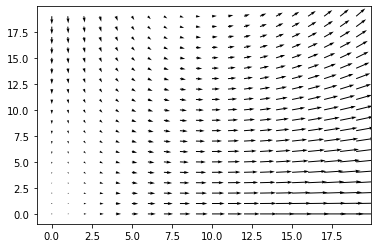

In [81]:
import numpy as np
import matplotlib.pyplot  as plt
import itertools
from itertools import product

x, y  = np.arange(20), np.arange(20)

# On choisit des valeurs de alpha, beta, etc trouvées dans la littérature
a = 1.5
b = 0.05
g = 0.48
d = 0.05

# On définit la fonction f telle que x' = f(x)
def f(x_1, x_2):
    return np.array([x_1*(a - b*x_2), -x_2*(g - d*x_1)])

x_1, y_1 = np.meshgrid(x, y)

#La liste des vitesses selon x et selon y.
X1 = np.array([f(x_1, y_1)])
u = []
v = []
for abs, ord in X1:
    u.append(abs)
    v.append(ord)
    
#On donne aux listes la bonne forme pour pouvoir les utiliser dans la fonction quiver
U = np.resize(u,(20,20))
V = np.resize(v,(20,20)) 
    
plt.quiver(x_1,y_1,U,V)
plt.show()

### Réponse 3

On raisonne par l'absurde.
Soit $(x_1, x_2)$ une solution de l'équation telle que il existe $t_1 > 0$ pour lequel $x_1(t_1) = 0$ (on pourra raisonner de même pour $x_2$).

D'après la dynamique du système, on a par ailleurs que si 
$\left
\{
\begin{array}{c}
\forall t \geqslant 0, x_1(t) = 0 \\ \dot{x_2} = - \gamma x_2
\end{array}
\right.$, 
alors on aura bien 
$\left
\{
\begin{array}{c}
\dot{x_1} = 0 \\ \dot{x_2} = - \gamma x_2
\end{array}
\right.$.
Donc toute fonction qui vérifie ces conditions est solution du système.

Or d'après le théorème de Cauchy-Lipschitz, il y a une unique solution maximale au problème de Cauchy initialisé en $x_0$.
Donc toute solution qui passe par la valeur $x_1 = 0$ à un instant $t_1$ vérifie nécessairement $\forall t, x_1(t) = 0$ par unicité car ces deux solutions coïncident en $t_1$. 

Ainsi, on ne pourra pas initialiser la solution en une valeur $x_0 = (x_{10}, x_{20}) $ telle que $x_{10} \ne 0$.
Donc toute solution qui sort de $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ à un instant donné est forcément initialisée en dehors de $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

Conclusion : Toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition.

### Réponse 4

On pose
$\begin{equation}
H:
\left|
  \begin{array}{rcl}
    \mathbb{R_{>0}^2} \to \mathbb{R}^2 \\
    (x_1, x_2) \longmapsto  \delta x_1 - \gamma lnx_1 + \beta x_2 - \alpha lnx_2\\
  \end{array}
\right.
\end{equation}$

On va calculer la dérivée de H le long des solutions initialisées dans $\mathbb{R_{+}^*}^2$.
On pose $X(t)=(x_1(t), x_2(t))$ donc $\dot{X}(t) = (\dot{x_1}(t), \dot{x_2}(t))$.

Par définition on a que $D_{\dot{X}(t)}H(X(t)) = \underset{m \to 0}{\lim} \frac{H(X(t)+m\dot{X}(t))-H(X(t))}{m}$
On a d'une part $H(X(t)+m\dot{X}(t)) = H(x_1(1+m(\alpha - \beta x_2)), x_2(1 - m(\gamma - \delta x_1)))$

Donc $H(X(t)+m\dot{X}(t))-H(X(t)) = \delta(x_1m(\alpha - \beta x_2))+\gamma ln(\frac{1}{1+m(\alpha - \beta x_2)}) - \beta x_2m(\gamma - \delta x_1) + \alpha ln(\frac{1}{1-m(\gamma - \delta x_1)})$

On a donc $D_{\dot{X}(t)}H(X(t)) = \delta(x_1(\alpha - \beta x_2)) + \beta x_2(\gamma - \delta x_1)  \\$
car  $ln(\frac{1}{1+m(\alpha - \beta x_2)}) \underset{0}{\sim} 1-m(\alpha - \beta x_2)$  
et  $ln(\frac{1}{1-m(\gamma - \delta x_1)}) \underset{0}{\sim} 1+m(\gamma - \delta x_1)$
Donc finalement $D_{\dot{X}(t)}H(X(t)) = 0$


Montrons que toute solution maximale initialisée dans $\mathbb{R_{+}^*}^2$ est globale.
On vient de montrer que $H(x_1(t),x_2(t)) = \delta x_1 - \gamma lnx_1 + \beta x_2 - \alpha lnx_2$ est un intégrale première du mouvement et est donc constante.

Ainsi si on considère une solution maximale initialisée dans $\mathbb{R_{+}^*}^2$, $(x_1,x_2)$ est une courbe de niveau de $H$, plus précisément la courbe d'équation $H(x_1,x_2) = H(x_{10},x_{20}) = A$ avec $A$ constante. C'est donc une courbe fermée, ainsi il ne peut y avoir explosion de la solution en temps fini ce qui implique que la solution est globale.


### Réponse 5

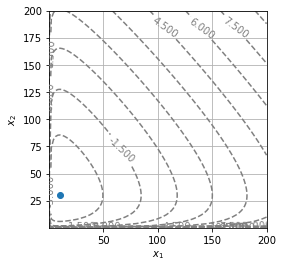

In [82]:
# algorithme qui affiche les courbes de niveaux d'une fonction f

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

# la fonction qui nous intéresse:

def H(x, y):
    x, y = np.array(x), np.array(y)
    return d*x - g*np.log(x) + b*y - a*np.log(y)

display_contour(
    H, 
    x=np.linspace(0.01, 200, 100), 
    y=np.linspace(0.01, 200, 100), 
    levels=15 # 15 levels, automatically selected
)

# On affiche le point d'équilibre xbar :
plt.scatter(g/d, a/b)

Graphiquement, les courbes de niveau semblent être "centrées" sur le point d'équilibre $\bar{x}$. On en déduit graphiquement que les solutions convergent vers $\bar{x}$, et que ce dernier est un point d'équilibre stable. 

En revanche, au voisinage de 0 les courbes de niveau semblent diverger, on en déduit graphiquement que $(0, 0)$ est un point d'équilibre instable. 

### Réponse 6

In [68]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    x = [x0]   # On crée les vecteurs x et t, sachant que les x[i] sont aussi des vecteurs.
    t = [t0]
    while t[-1] <= tf :
        x0 = x0 + dt*f(t0, x0)
        t0 += dt   # on incrémente le temps de delta t 
        x.append(x0)
        t.append(t0)
    x, t = np.array(x), np.array(t)
    return t, x

On va tester le schéma d'Euler sur l'oscillateur harmonique, dont le mouvement $x(t)$ est tel que $\ddot{x} = -k/m x$ où $k$ est la constante de raideur du ressort et m la passe du point matériel considéré. 

Pour simplifier, on prendra k/m = 1

On a dans ce cas $\dot{X} = f_2(X)$ avec $f_2(X) = AX$ 
où $X$ est le vecteur $(\dot{x}(t) ; x(t))$ avec $x(t)$ la trajectoire du point matériel considéré,

et $ A = \begin{pmatrix}
                0 & -1 \\
                1 & 0
              \end{pmatrix}$

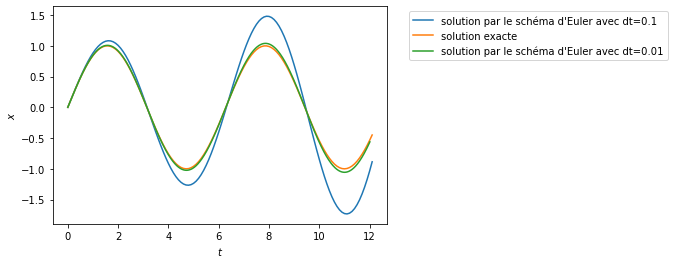

In [95]:
# On teste le schéma d'Euler de l'oscillateur harmonique avec k/m = 1 

def f1(t, x): # x est un vecteur de Rn 
    A = np.array([[0, -1], [1, 0]])
    return np.dot(A,x)

T0, X0 = solve_euler_explicit(f1, [1,0], 0.1 , 0, 12)
T1, X1 = solve_euler_explicit(f1, [1,0], 0.01 , 0, 12) # On fait tendre le pas vers 0

# ici x0 = 0 et v0 = 1
# La vraie solution, avec ces conditions initiales, est : y = sin(t) 

Y = np.array([np.sin(t) for t in T0])

plt.plot(T0, X0[:,1], label="solution par le schéma d'Euler avec dt=0.1") # On affiche seulement la deuxième ligne du vecteur X, c'est à dire la position (courbe bleue)
plt.plot(T0, Y, label="solution exacte")# On affiche aussi la solution exacte pour comparer  (courbe orange)
plt.plot(T1, X1[:,1], label="solution par le schéma d'Euler avec dt=0.01") # Courbe verte

plt.xlabel("$t$") 
plt.ylabel("$x$")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

On remarque que plus le pas diminue, plus les solutions du schéma d'Euler sont proches de la solution exacte. 

Déterminons maintenant l'ordre de convergence $p$. En effet, d'après le cours, si il existe un entier naturel p et une constante $c > 0$ tels que $max_{0<j<k} \left\| x^j - x \right\| \leq c (\Delta t)^p $ alors le schéma numérique est convergent à l'ordre $p$. 

On peut donc chercher à tracer le logarithme de l'erreur entre la solution approchée et la solution exacte afin de visualiser la pente, qui sera donc proportionnelle à $p$.

<ipython-input-114-81510cba676b>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(T0, np.log(V)/np.log(0.1))


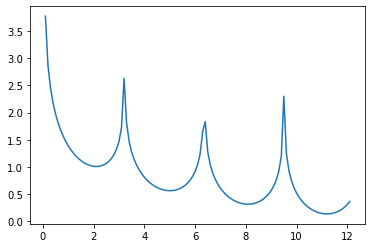

In [114]:
V = []
for i in range (len(Y)):
    V.append(np.linalg.norm(Y[i]-X0[:,1][i]))
    
plt.plot(T0, np.log(V)/np.log(0.1))
plt.show()

On n'obtient pas de droite, mais nous n'avons pas compris pourquoi la courbe obtenue ne correspond pas à la courbe attendue...

### Réponse 7

In [70]:
def F(t, x): # notre fonction f mais qui prend en argument t et un vecteur x
    x = np.array(x)
    return np.array([x[0]*(a - b*x[1]), -x[1]*(g - d*x[0])])

# On applique la fonction d'Euler à notre fonction F avec plusieurs points initiaux x0

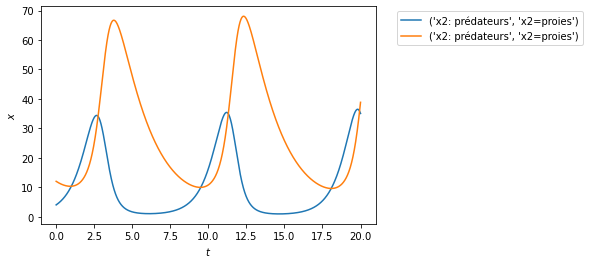

In [83]:
# Pour x0 = [4, 12] (le nombre de proies est initialement faible par rapport à celui de prédateurs)

T, X = solve_euler_explicit(F, [4, 12], 0.01 , 0, 20)

plt.plot(T, X, label=("x2: prédateurs", "x2=proies"))
plt.xlabel("$t$") 
plt.ylabel("$x$")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# La courbe orange modélise l'évolution du nombre de prédateurs et la bleue celle de proies.

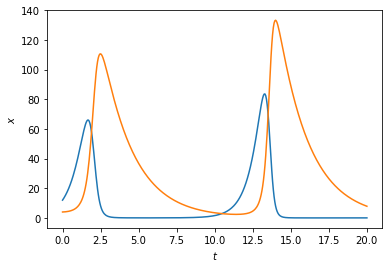

In [85]:
# Pour x0 = [12, 4]

T, X = solve_euler_explicit(F, [12, 4], 0.05 , 0, 20)

plt.plot(T, X)
plt.xlabel("$t$") 
plt.ylabel("$x$")
plt.show()

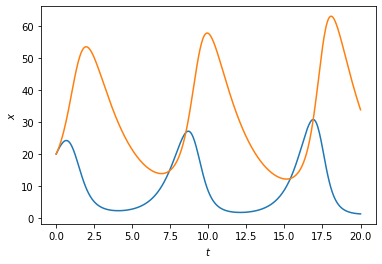

In [86]:
# Pour le même nombre initial de proies et de prédateurs : 
T_1, X_1 = solve_euler_explicit(F, [20, 20], 0.05 , 0, 20)

plt.plot(T_1, X_1)
plt.xlabel("$t$") 
plt.ylabel("$x$")
plt.show()

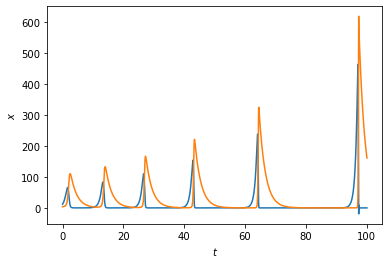

In [87]:
# sur un temps plus long : tf = 100

T, X = solve_euler_explicit(F, [12, 4], 0.05 , 0, 100)

plt.plot(T, X)
plt.xlabel("$t$") 
plt.ylabel("$x$")
plt.show()

On remarque que les solutions présentent une sorte de schéma périodique, ce qui semble fidèle à la réalité. Ainsi, aucune des populations ne s'éteint complètement.

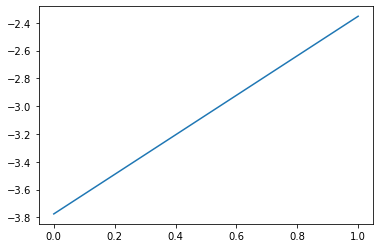

In [88]:
# On trace la fonction H avec les solutions donnée par le schéma d'Euler explicite

evolutionH = H(X[0], X[1])
plt.plot(evolutionH)
plt.show()

Nous ne savons pas pourquoi $H$ n'est pas constant.

### Réponse 8

In [24]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    x = [x0]   # On crée les vecteurs x et t, sachant que les xi sont aussi des vecteurs à deux.
    t = [t0]

# Les variables indicées x_j correespondent à l'approximation de la solution x(t) évaluée en t_j = t0 + j*dt 
# j prend des valeurs comprises entre 0 et N où N est défini par : tf-t0 = N*dt
    x_j = x0
    t_j = t0
    
    while t[-1] <= tf :
        x_j0 = x_j + dt*f(t[-1], x_j) # On approxime d'abord x_j+1 par la méthode d'Euler explicite
        
    # les variables indicées par k sont celles issues des approximations successives de x_j+1 par l'algorithme du point fixe
    # k est un entier qui va de 1 à itermax
        x_jk = x_j0

        def F(x): # c'est la fonction dont on cherche le point fixe pour affiner l'approximation de x_j+1
            return x_j + dt*f(t[-1]+dt, x)
        
        for k in range (itermax):
            x_jk1 = F(x_jk) # x_j,k+1 est le point fixe de F 
            if (x_jk1[0]-x_jk[0])/x_j0[0] < 10**(-4) and (x_jk1[1]-x_jk[1])/x_j0[1] < 10**(-4): # On détermine un seuil de convergence, arbitrairement 10**-4
                break
            x_jk = x_jk1
   
        t_j += dt
        x_j = x_jk # la valeur x_j+1 (donc nouvelle valeur de x_j) est donc la dernière obtenue par la boucle for ci-dessus
        x.append(x_j)
        t.append(t_j)
        
    x, t = np.array(x), np.array(t)
    return t, x


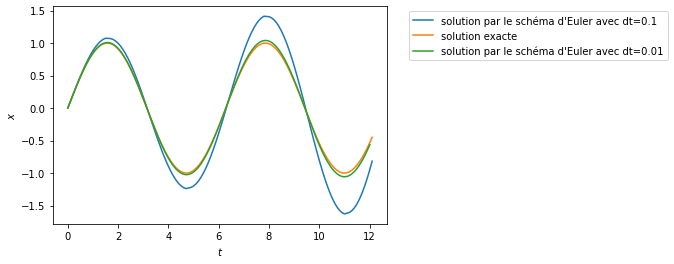

In [56]:
# On vérifie de même la convergence avec l'exemple de l'oscillateur harmonique

T, X = solve_euler_implicit(f1, [1,0], 0.1 , 0, 12)
T1, X1 = solve_euler_implicit(f1, [1,0], 0.01 , 0, 12) # On fait tendre le pas vers 0

# ici x0 = 0 et v0 = 1
# La vraie solution, avec ces conditions initiales, est : y = sin(t) 

Y = np.array([np.sin(t) for t in T])

plt.plot(T, X[:,1], label="solution par le schéma d'Euler avec dt=0.1") # On affiche seulement la deuxième ligne du vecteur X, c'est à dire la position (courbe bleue)
plt.plot(T, Y, label="solution exacte") # On affiche aussi la solution exacte pour comparer  (courbe orange)
plt.plot(T1, X1[:,1], label="solution par le schéma d'Euler avec dt=0.01") # Courbe verte

plt.xlabel("$t$") 
plt.ylabel("$x$")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

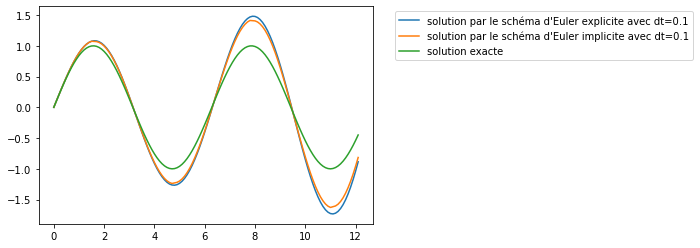

In [57]:
# On compare les solutions d'Euler implicite et explicite

plt.plot(T0, X0[:,1], label="solution par le schéma d'Euler explicite avec dt=0.1")
plt.plot(T, X[:,1], label="solution par le schéma d'Euler implicite avec dt=0.1")
plt.plot(T, Y, label="solution exacte")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

On remarque que la solution avec la méthode implicite est plus proche de la solution exacte. 

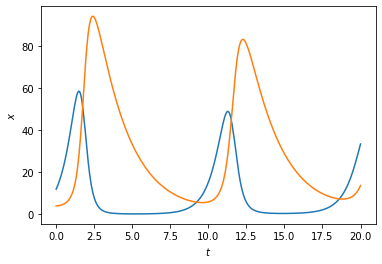

In [89]:
T, X = solve_euler_implicit(F, [12, 4], 0.05 , 0, 20)

plt.plot(T, X)
plt.xlabel("$t$") 
plt.ylabel("$x$")
plt.show()

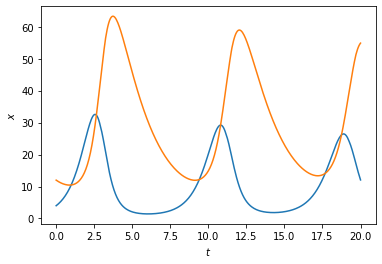

In [90]:
T, X = solve_euler_implicit(F, [4, 12], 0.05 , 0, 20)

plt.plot(T, X)
plt.xlabel("$t$") 
plt.ylabel("$x$")
plt.show()

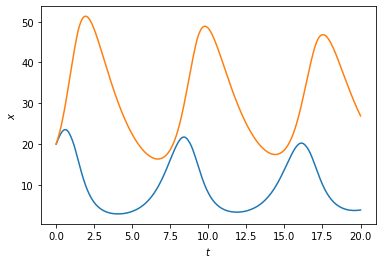

In [91]:
# Avec un nombre initial égal de proies et de prédateurs
T, X = solve_euler_implicit(F, [20, 20], 0.05 , 0, 20)

plt.plot(T, X)
plt.xlabel("$t$") 
plt.ylabel("$x$")
plt.show()


On remarque que les solutions sont différentes de celles trouvées par le schéma d'Euler explicite. 

### Réponse 9

Soit le système d'équation (2):

$\left
\{\begin{array}{r c l}
   \dot{x_1} = x_1 (\alpha - \beta x_2)-u_1(x_1,x_2)(H(x_1,x_2)-H_0) \\
   \dot{x_2} = - x_2 (\gamma - \delta x_1)-u_2(x_1,x_2)(H(x_1,x_2)-H_0) 
\end{array}
\right.$

On a vu à la question 4 que $H$ était constant le long des solutions des équations de prédation. Donc si on prend $x(t)$ une solution des équations de prédation de Lotka-Volterra initiales, et si $H_0 = H(x_0)$, alors $H(x_1,x_2) = H_0$ donc $x(t)$ est une solution du système d'équation (2).

### Réponse 10

On va calculer la dérivée de $H-H_0$ le long des solutions du nouveau système.
On pose $X(t)=(x_1(t), x_2(t))$ une solution des nouvelles équations donc $\dot{X}(t) = (\dot{x_1}(t), \dot{x_2}(t))$.

Par définition on a que $D_{\dot{X}(t)}(H-H_0)(X(t)) = \underset{m \to 0}{\lim} \frac{H(X(t)+m\dot{X}(t))-H(X(t))}{m}$ car les $H_0$ s'annulent.
Le calcul est le même qu'à la question 5 sauf qu'un terme supplémentaire vient s'ajouter.
On obtient donc après simplification $D_{\dot{X}(t)}(H-H_0)(X(t)) = (u_2(x_1,x_2)-u_1(x_1,x_2))(H(x_1,x_2)-H_0)$.

D'après l'énoncé, on a $\| t)-\bar{x}\| \geq c' >0$, avec $c'$ une constante. Or, le gradient de $H$ s'annulant uniquement en $\bar{X}$, cela signifie que $\| \nabla H(t))\|$ est strictement positif donc on montre que $\| \nabla H(t))\| \geq c>0$, avec $c$ une constante.

Donc sachant qu'on a $\frac{d}{dt}(H(t))-h_0) = -k\| \nabla H(t))\|^2(H(t))-H_0)$, cela signifie que $\frac{d}{dt}(H(t))-H_0) \leq -kc^2(H(t))-H_0)$.
On en déduit que $(H(t))-H_0) \leq \lambda exp(-kc^2t)$ qui est une exponentielle décroissante.

Donc $H(t)$ converge exponentiellement vers $H_0$ lorque t tend vers l'infini si x reste à une distance strictement positive de $\bar{x}$.

### Réponse 11

Dans le schéma d'Euler explicite, on a $x^{j+1} = x^j + dtf(t_j, x^j)$.

Donc $H(x^{j+1}) - H(x_0) = H(x^j + dtf(t_j, x^j) - H(x_0)$

Or, $H(x^j + dtf(t_j, x^j)) = \delta x^j_1 - \gamma ln(x^j_1 + dtf_1(t_j, x^j)) + \beta x^j_2 - \alpha ln(x^j_2 + dtf_2(t_j, x^j)) + \delta dt f_1(t_j, x^j) + \beta dt f_2(t_j, x^j)$

et $ln(x^j_1 + dtf_1(t_j, x^j)) = ln(x^j_1 (1 + \frac{dt f_1(t_j, x^j)}{x^j_1})) = ln(x^j_1) + ln(1 + \frac{dt f_1(t_j, x^j)}{x^j_1}) \backsimeq ln(x^j_1) + \frac{dt f_1(t_j, x^j)}{x^j_1}$.

Donc au premier ordre $H(x^{j+1}) - H(x_0) = H(x^j) - H(x_0) - \gamma \frac{dt f_1(t_j, x^j)}{x^j_1} - \alpha \frac{dt f_2(t_j, x^j)}{x^j_2} + \delta dt f_1(t_j, x^j) + \beta dt f_2(t_j, x^j)$.

Nous avons suivi l'indication mais nous n'avons pas compris le lien avec le rôle de k. En revanche, pour assurer la stabilité de H, on peut modifier la fonction f en rajoutant le terme $u (H-H_0)$. Ainsi, les solutions du nouveau système contiennent les solutions de l'ancien système. Si $k$ augmente, $H$ converge plus vite vers $H_0$.